In [ ]:
pip install opencv-python

     ---------------------------------------- 35.6/35.6 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

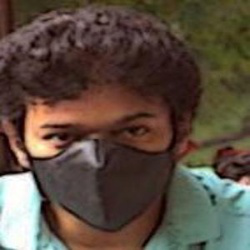

In [ ]:
image.load_img(r"C:\Users\selva\Desktop\computer vision\base data\training\with-mask\Image_3 (3).jpg")

In [ ]:
plt.imshow(img)

NameError: name 'img' is not defined

In [ ]:
cv2.imread(r"C:\Users\selva\Desktop\computer vision\base data\training\with-mask\Image_3 (3).jpg").shape

(250, 250, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/250)
validation =ImageDataGenerator(rescale=1/250)

In [ ]:
train_dataset = train.flow_from_directory(r'C:\Users\selva\Desktop\computer vision\base data\training',
                                          target_size= (250,250),
                                          batch_size= 3,
                                          class_mode= 'binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\selva\Desktop\computer vision\base data\validation',
                                                    target_size=(250,250),
                                                    batch_size= 3,
                                                    class_mode= 'binary')

Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
model =tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(250,250,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation ='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs=50,
                      validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 12.3552 - accuracy: 0.3333 - val_loss: 0.8469 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 4s 2s/step - loss: 1.6082 - accuracy: 0.2222 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 4s 2s/step - loss: 0.7377 - accuracy: 0.5556 - val_loss: 0.6993 - val_accuracy: 0.5083
Epoch 4/50
3/3 [==============================] - 4s 2s/step - loss: 0.3448 - accuracy: 1.0000 - val_loss: 1.2691 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 4s 2s/step - loss: 0.9741 - accuracy: 0.4444 - val_loss: 0.6651 - val_accuracy: 0.5167
Epoch 6/50
3/3 [==============================] - 4s 2s/step - loss: 0.6538 - accuracy: 0.5556 - val_loss: 0.6302 - val_accuracy: 0.5292
Epoch 7/50
3/3 [==============================] - 4s 2s/step - loss: 0.6610 - accuracy: 0.6667 - val_loss: 0.6744 - val_accuracy: 0.5292
Epoch 8/50
3/3 [========================

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) 

In [ ]:
validation_dataset.class_indices
{'with_mask':0,'without_mask':1}

{'with_mask': 0, 'without_mask': 1}

In [ ]:
import os

In [ ]:
dir_path = 'C:\\Users\\selva\\Desktop\\computer vision\\base data\\testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'\\'+ i)
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("with mask")
    else:
        print("without mask")
    





PermissionError: [Errno 13] Permission denied: 'C:\\Users\\selva\\Desktop\\computer vision\\base data\\testing\\with-mask'

In [ ]:
pwd

'C:\\Users\\selva'